In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch .arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Preictions")
    
    plt.legend(prop={"size": 14})

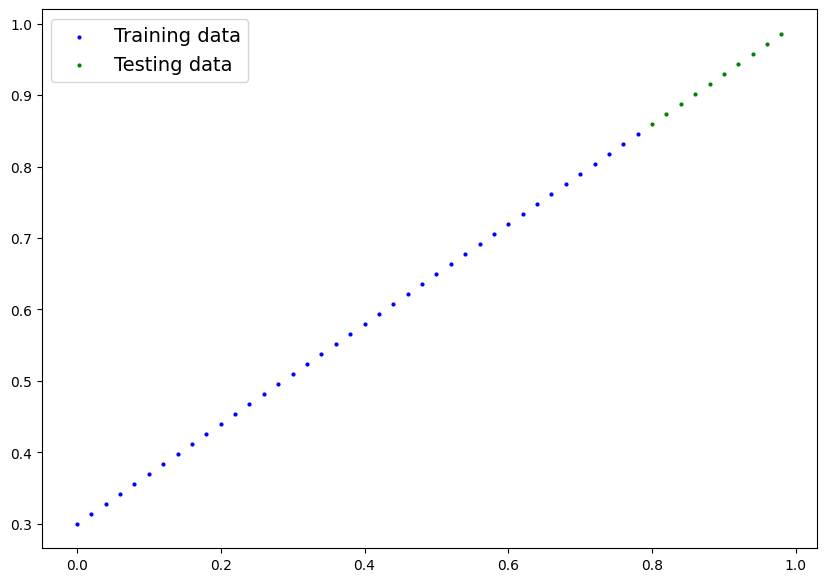

In [6]:
plot_predictions()

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [11]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


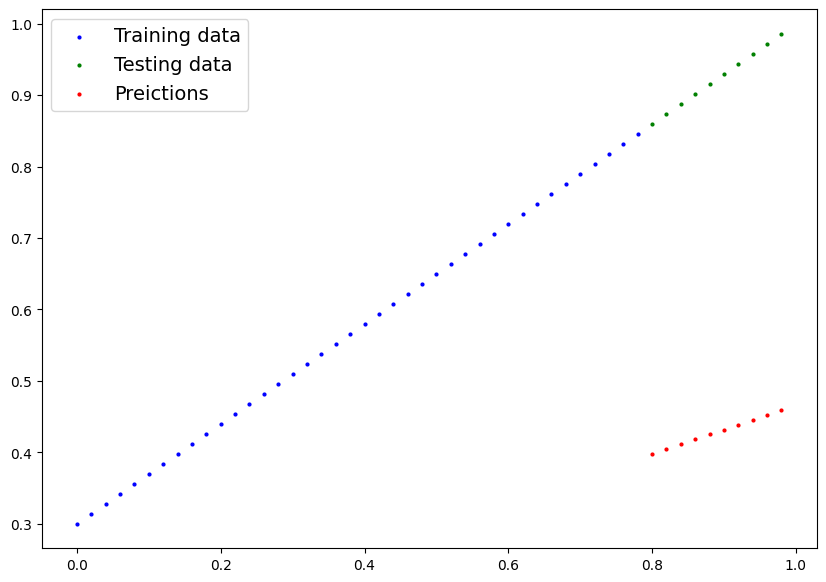

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
loss_fn = nn.L1Loss()
optimiser = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)
epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

tensor([[0.1288],
        [0.1355],
        [0.1423],
        [0.1490],
        [0.1557],
        [0.1625],
        [0.1692],
        [0.1759],
        [0.1827],
        [0.1894],
        [0.1961],
        [0.2029],
        [0.2096],
        [0.2163],
        [0.2231],
        [0.2298],
        [0.2366],
        [0.2433],
        [0.2500],
        [0.2568],
        [0.2635],
        [0.2702],
        [0.2770],
        [0.2837],
        [0.2904],
        [0.2972],
        [0.3039],
        [0.3106],
        [0.3174],
        [0.3241],
        [0.3308],
        [0.3376],
        [0.3443],
        [0.3510],
        [0.3578],
        [0.3645],
        [0.3712],
        [0.3780],
        [0.3847],
        [0.3914]], grad_fn=<AddBackward0>)
Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
tensor([[0.1388],
        [0.1456],
        [0.1524],
        [0.1592],
        [0.1661],
        [0.1729],
        [0.1797],
        [0.1865],
        [0.1933],
        

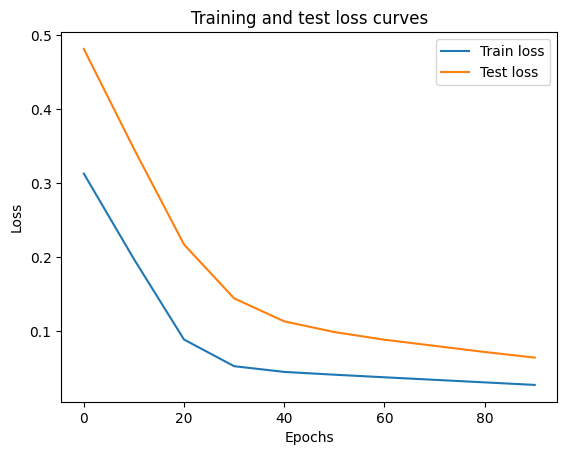

In [17]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [18]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

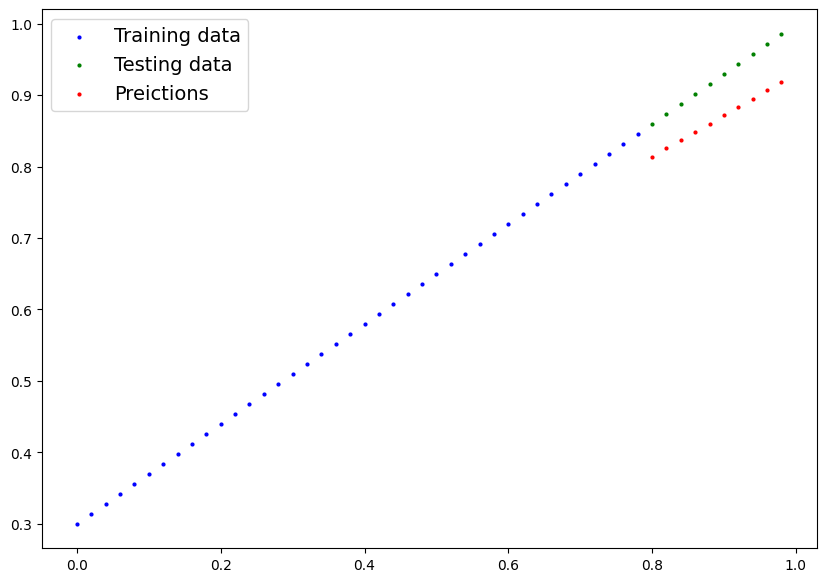

In [19]:
plot_predictions(predictions=y_preds)

In [20]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


In [21]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [23]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [25]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [26]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [27]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end , step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [28]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

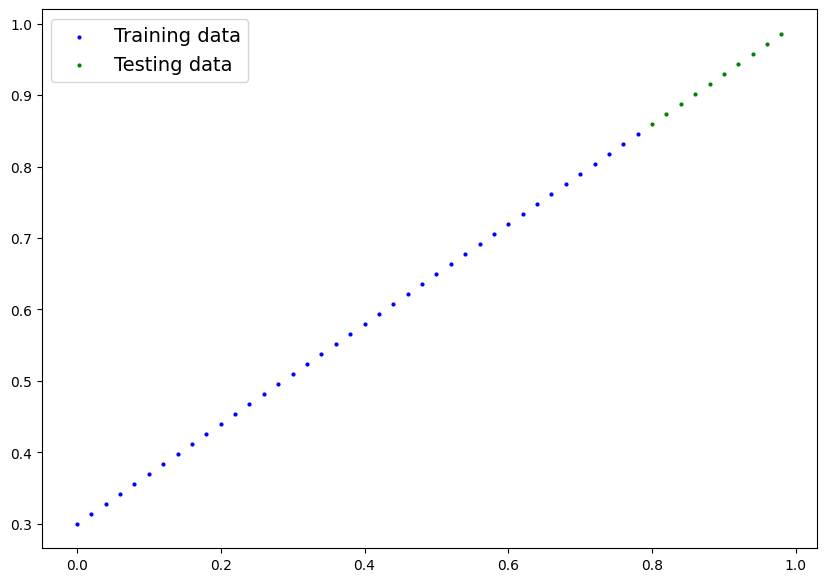

In [29]:
plot_predictions(X_train, y_train, X_test, y_test)

In [31]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [32]:
loss_fn = nn.L1Loss()
optimiser = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [34]:
torch.manual_seed(42)

epochs = 1000
train_loss = []

for epoch in range(epochs):
    model_1.train()
    optimiser.zero_grad()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss.append(loss)
    optimiser.step()
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 100 | Train loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 200 | Train loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 300 | Train loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 400 | Train loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 500 | Train loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 600 | Train loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 700 | Train loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 800 | Train loss: 0.5551779866218567 | Test loss: 0.5874472260475159
Epoch: 900 | Train loss: 0.5551779866218567 | Test loss: 0.5874472260475159
